## Telecom Churn Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [2]:
data=pd.read_csv('telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#to get the shape of the data set
data.shape

(99999, 226)

In [4]:
# to check the data description of the data set
#pd.options.display.max_columns=27
pd.set_option('display.max_columns', None)
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
# to get the information of the data set

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#replacing null to avoid compulational issue --
data[['total_rech_amt_6','total_rech_amt_7','total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']] = data[['total_rech_amt_6','total_rech_amt_7','total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_7']].replace(np.nan, 0, regex=True)

In [7]:
## Creating total amount KPI for Data:-

data['total_rech_amt_data_6'] = data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
data['total_rech_amt_data_7'] = data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [8]:
## Creating average amount KPI for data + talktime:-
data['avg_rech_amt_6_7'] =data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

In [9]:
#Lets create a KPI for decile
data['avg_rech_decile'] = pd.qcut(data['avg_rech_amt_6_7'], 10, labels=False)

In [10]:
#data['Average']=data[['c','d']].mean(axis=1)
data=data[data.avg_rech_decile >= 7 ]
data.shape

(29953, 230)

In [11]:
#following column were created to get high value customer so we will delete it now
x=['total_rech_amt_data_6','total_rech_amt_data_7','avg_rech_amt_6_7','avg_rech_decile']
data.drop(columns=x,inplace=True)

In [12]:
#to check the null value in the data set
pd.set_option('display.max_rows',None)
round(100*(data.isnull().sum()/data.shape[0]),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               0.74
std_og_t2o_mou               0.74
loc_ic_t2o_mou               0.74
last_date_of_month_6         0.00
last_date_of_month_7         0.09
last_date_of_month_8         0.55
last_date_of_month_9         1.22
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  1.81
onnet_mou_7                  1.79
onnet_mou_8                  3.91
onnet_mou_9                  6.34
offnet_mou_6                 1.81
offnet_mou_7                 1.79
offnet_mou_8                 3.91
offnet_mou_9                 6.34
roam_ic_mou_6                1.81
roam_ic_mou_7                1.79
roam_ic_mou_8                3.91
roam_ic_mou_9                6.34
roam_og_mou_6                1.81
roam_og_mou_7                1.79
roam_og_mou_8                3.91
roam_og_mou_9                6.34
loc_og_t2t_mou

In [13]:
#keeping those columns only in which missing value percentage is less than 60 percent
data1=data.loc[:,data.isnull().mean()<0.4]
pd.set_option('display.max_rows',None)
round(100*(data1.isnull().sum()/data1.shape[0]),2)

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          0.74
std_og_t2o_mou          0.74
loc_ic_t2o_mou          0.74
last_date_of_month_6    0.00
last_date_of_month_7    0.09
last_date_of_month_8    0.55
last_date_of_month_9    1.22
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             1.81
onnet_mou_7             1.79
onnet_mou_8             3.91
onnet_mou_9             6.34
offnet_mou_6            1.81
offnet_mou_7            1.79
offnet_mou_8            3.91
offnet_mou_9            6.34
roam_ic_mou_6           1.81
roam_ic_mou_7           1.79
roam_ic_mou_8           3.91
roam_ic_mou_9           6.34
roam_og_mou_6           1.81
roam_og_mou_7           1.79
roam_og_mou_8           3.91
roam_og_mou_9           6.34
loc_og_t2t_mou_6        1.81
loc_og_t2t_mou_7        1.79
loc_og_t2t_mou_8        3.91
loc_og_t2t_mou_9        6.34
loc_og_t2m_mou_6        1.81
loc_og_t2m_mou

In [14]:
data1.shape

(29953, 190)

In [15]:
#to get the top 5 row of the data set
pd.set_option('display.max_columns', None)
data1.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,252.0,252.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49

In [16]:
#deriving new variable churn which will be the target variable
condition_list = [((data1["total_ic_mou_9"] == 0) & 
                   (data1["total_og_mou_9"] == 0) & 
                   (data1["vol_2g_mb_9"] == 0) &
                   (data1["vol_3g_mb_9"] == 0)),
                  ((data1["total_ic_mou_9"] !=0) | 
                   (data1["total_og_mou_9"] !=0) | 
                   (data1["vol_2g_mb_9"] !=0) |
                   (data1["vol_3g_mb_9"] !=0))
                 ]
choice_list = [1,0]
data1["churn"] = np.select(condition_list, choice_list)

In [17]:
#to get number of churn and non churn
data1['churn'].value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [18]:
#dropping the rows with na values
data1.dropna(inplace=True)

In [19]:
#to check null value is present in the data set 
round(100*(data1.isnull().sum()/data1.shape[0]),2)

mobile_number           0.0
circle_id               0.0
loc_og_t2o_mou          0.0
std_og_t2o_mou          0.0
loc_ic_t2o_mou          0.0
last_date_of_month_6    0.0
last_date_of_month_7    0.0
last_date_of_month_8    0.0
last_date_of_month_9    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
onnet_mou_9             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
offnet_mou_9            0.0
roam_ic_mou_6           0.0
roam_ic_mou_7           0.0
roam_ic_mou_8           0.0
roam_ic_mou_9           0.0
roam_og_mou_6           0.0
roam_og_mou_7           0.0
roam_og_mou_8           0.0
roam_og_mou_9           0.0
loc_og_t2t_mou_6        0.0
loc_og_t2t_mou_7        0.0
loc_og_t2t_mou_8        0.0
loc_og_t2t_mou_9        0.0
loc_og_t2m_mou_6        0.0
loc_og_t2m_mou_7        0.0
loc_og_t2m_mou_8    

In [20]:
#to get number of chrn and non churn
data1['churn'].value_counts()

0    26361
1      719
Name: churn, dtype: int64

In [21]:
# to delete all the column which 9 in the name 
del_9=[col for col in data1.columns if '_9' in col]
data1.drop(columns=del_9,inplace=True)

In [22]:
# to delete all the column which sep in the name 
del_sep=[col for col in data1.columns if 'sep' in col]
data1.drop(columns=del_sep,inplace=True)

In [23]:
# to store name of all the column whose data type is int
list=data1.select_dtypes(include='int64').columns
list

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon'],
      dtype='object')

In [24]:
# to store name of all the column whose data type is float
list2=data1.select_dtypes(include='float64').columns
list2

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'av_rech_amt_data_7', 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8',
       'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=112)

In [25]:
## to store name of all the column whose data type is object
list3=data1.select_dtypes(include='object').columns
list3

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],
      dtype='object')

In [26]:
#converting the data type from object to date
data1['last_date_of_month_6']=pd.to_datetime(data1['last_date_of_month_6'])
data1['last_date_of_month_7']=pd.to_datetime(data1['last_date_of_month_7'])
data1['last_date_of_month_8']=pd.to_datetime(data1['last_date_of_month_8'])
data1['date_of_last_rech_6']=pd.to_datetime(data1['date_of_last_rech_6'])
data1['date_of_last_rech_7']=pd.to_datetime(data1['date_of_last_rech_7'])
data1['date_of_last_rech_8']=pd.to_datetime(data1['date_of_last_rech_8'])

In [27]:
#creating new column days recharge down before in that particular month
data1['days_recharge_done_6']=data1['last_date_of_month_6']-data1['date_of_last_rech_6']
data1['days_recharge_done_7']=data1['last_date_of_month_7']-data1['date_of_last_rech_7']
data1['days_recharge_done_8']=data1['last_date_of_month_8']-data1['date_of_last_rech_8']


In [28]:
#to change the data type from days to int
data1['days_recharge_done_6']=data1['days_recharge_done_6'].dt.days
data1['days_recharge_done_7']=data1['days_recharge_done_7'].dt.days
data1['days_recharge_done_8']=data1['days_recharge_done_8'].dt.days

In [29]:
#checking the data type
data1['days_recharge_done_8'].head(5)


8     1
21    0
23    7
33    5
38    7
Name: days_recharge_done_8, dtype: int64

In [30]:
#as we have extracted number of days recharge done before we can delete date columns as we cannot extract any more useful data
data1.drop(columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
                    'date_of_last_rech_7','date_of_last_rech_8'],inplace=True)

In [31]:
# we will drop mobile number and circle id as it will be of no importnace in predicting churn
data1.drop(columns=['mobile_number','circle_id'],inplace=True)

In [32]:
#finding the corelation 
corr=data1.corr()
corr

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arpu_6,NaN,NaN,NaN,1.000000,0.747277,0.686183,0.343065,0.230031,0.206148,0.523877,0.368633,0.324037,0.117993,0.087851,0.097365,0.188707,0.149227,0.134655,0.168799,0.133752,0.132860,0.342664,0.

In [33]:
# to check the diffrent value present in columns from above correlation we see some variable have nan correlation with all 
#other variable
for i in data1.columns:
    print(i)
    if len(data1[i].value_counts())<5:
        print(data1[i].value_counts())
        print('------------------------------------------------------------')

loc_og_t2o_mou
0.0    27080
Name: loc_og_t2o_mou, dtype: int64
------------------------------------------------------------
std_og_t2o_mou
0.0    27080
Name: std_og_t2o_mou, dtype: int64
------------------------------------------------------------
loc_ic_t2o_mou
0.0    27080
Name: loc_ic_t2o_mou, dtype: int64
------------------------------------------------------------
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
0.0    27080
Name: std_og_t2c_mou_6

In [34]:
#from above we observe there are few column which have single type variable in the columns
#so to keep on safe side we check the those column which have diffrent variable less than 5
for i in data1.columns:
    if len(data1[i].value_counts())<5:
        print(i)
        print(data1[i].value_counts())
        print('------------------------------------------------------------')

loc_og_t2o_mou
0.0    27080
Name: loc_og_t2o_mou, dtype: int64
------------------------------------------------------------
std_og_t2o_mou
0.0    27080
Name: std_og_t2o_mou, dtype: int64
------------------------------------------------------------
loc_ic_t2o_mou
0.0    27080
Name: loc_ic_t2o_mou, dtype: int64
------------------------------------------------------------
std_og_t2c_mou_6
0.0    27080
Name: std_og_t2c_mou_6, dtype: int64
------------------------------------------------------------
std_og_t2c_mou_7
0.0    27080
Name: std_og_t2c_mou_7, dtype: int64
------------------------------------------------------------
std_og_t2c_mou_8
0.0    27080
Name: std_og_t2c_mou_8, dtype: int64
------------------------------------------------------------
std_ic_t2o_mou_6
0.0    27080
Name: std_ic_t2o_mou_6, dtype: int64
------------------------------------------------------------
std_ic_t2o_mou_7
0.0    27080
Name: std_ic_t2o_mou_7, dtype: int64
-------------------------------------------------

In [35]:
# data3 =data1.filter(['churn','roam_ic_mou_8','total_ic_mou_8', 'roam_og_mou_8', 'vol_2g_mb_8'
# , 'roam_og_mou_7'
# , 'std_og_mou_7'
# , 'total_og_mou_8'
# , 'last_day_rch_amt_8'
# , 'total_rech_num_6'
# , 'days_recharge_done_8'
# , 'loc_og_t2m_mou_8'
# , 'av_rech_amt_data_7'
# , 'loc_ic_t2f_mou_7'
# , 'onnet_mou_7'], axis=1)

# for feature in data3.columns[1:15]:
#     sns.set(style="whitegrid")
#     sns.countplot(x=feature,hue='churn',data=data3)
#     plt.show()


In [36]:
#dropping all these column because all these column have single type variable
del1=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_6','std_ic_t2o_mou_6'
     ,'std_ic_t2o_mou_7','std_ic_t2o_mou_8']
data1.drop(columns=del1,inplace=True)

In [37]:
# to check the data description of the data set
#pd.options.display.max_columns=27
pd.set_option('display.max_columns', None)
data1.describe(percentiles=[.25,.30,.35,.40,.45,.5,.75,.80,.85,.90,.92,.95,.96,.97,.98,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
count,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.0,27080.0,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.00000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000,27080.000000
mean,560.758170,572.598226,537.565678,264.504951,276.790338,251.116596,378.500580,389.625907,357.710943,16.380500,12.865696,13.300877,26.829959,20.371392,21.009023,87.818708,90.385087,84.335873,168.573470,170.381506,162.743373,6.538985,6.677293,6.253689,1.597967,1.911301,1.798409,262.939669,267.452564,25

# Fetaure standardisation

In [38]:
data2=data1.copy()
data2.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.00,356.00,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0,5,0,1
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0,0,0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.0,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.0,0.0,0.0,0.0,2.36,6.35,39.61,0.0,0.01,0.0,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,20.71,61.04,76.64,95.91,113.36,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.0,0.0,0.0,0.0,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,0.0,356.0,0.00,0.48,0.01,0.0,599.09,1009.92,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0,12,24,7
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [39]:
data1.shape


(27080, 134)

In [40]:
datalist=data1.columns.tolist()
datalist.remove('churn')

In [41]:
# we are gonna cap the outlier for this we will take 0.95 and 0.05 quantile as our value
for col in datalist:
    percentile=data1[col].quantile([0.05,0.95]).values
    data1[col][data1[col]<=percentile[0]]=percentile[0]
    data1[col][data1[col]>=percentile[1]]=percentile[1]

{'whiskers': [<matplotlib.lines.Line2D at 0x21a80a2a278>,
 'caps': [<matplotlib.lines.Line2D at 0x21a80a1a748>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a80a2a128>],
 'medians': [<matplotlib.lines.Line2D at 0x21a80a1add8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a80a1aeb8>],
 'means': []}

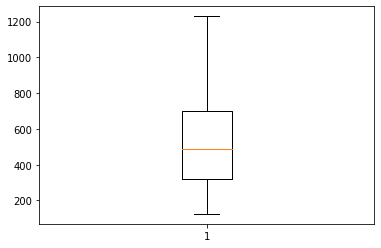

In [42]:
plt.boxplot(data1['arpu_6'])

# Splitting the data set to train and test

In [43]:
y=data1.pop('churn')
y.head()

8     0
21    0
23    0
33    0
38    0
Name: churn, dtype: int32

In [44]:
y.value_counts()

0    26361
1      719
Name: churn, dtype: int64

In [45]:
X=data1
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
8,378.7210,492.22300,137.362,413.69,351.03,35.08,94.6600,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.0,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.690,0.0,0.0,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.0,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.6600,171.56,23.84,9.84,0.31,57.5800,13.980,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.8600,28.49,16.54,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,19,21,14,437,601,120.0,90,154,30,50,0,10,0.0,2.0,0.0,177.0,0.00,356.00,0.03,0.0000,750.9500,11.940,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.6500,122.16,5,0,1
21,514.4530,597.75300,637.760,102.41,132.11,85.14,757.9300,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.0,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.819,0.0,0.0,0.0,0.0,0.0,763.29,934.69,938.79,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.7900,1068.54,2.48,10.19,19.54,118.2300,74.630,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.0900,131.89,261.04,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0000,22,26,27,600,680,718.0,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0000,0.0000,0.000,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.0000,0.00,0,0,0
23,124.9623,193.89700,366.966,48.96,50.66,33.58,85.4100,89.36,205.89,0.0,0.0,0.0,0.0,0.0,0.0,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.0,0.00,0.0,0.0,9.78,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.610,0.0,0.0,0.0,0.0,0.0,2.36,6.35,39.61,0.0,0.01,0.0,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.0400,239.48,20.71,61.04,76.64,95.9100,113.360,146.84,0.00,0.00,0.71,116.63,174.41,224.21,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.5800,222.89,298.33,0.0,0.0,0.0,0.0,28.23,3.74,0.00,4.81,4.1005,3,5,4,140,454,439.0,30,179,179,0,179,0,0.0,2.0,0.0,356.0,0.00,0.48,0.01,0.0000,599.0900,1009.920,0,0,0,0,0,0,0,1,1,0,0,1,604,40.45,51.8600,0.00,12,13,7
33,977.0200,1265.40445,409.230,

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [47]:
scaler=StandardScaler()

In [48]:
scaling_columns=data1.columns
scaling_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'days_recharge_done_6',
       'days_recharge_done_7', 'days_recharge_done_8'],
      dtype='object', length=133)

In [49]:
X_train[scaling_columns]=scaler.fit_transform(X_train[scaling_columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
10523,-0.561081,-0.834465,-0.162191,-0.498995,-0.620266,-0.398355,-0.594405,-0.780683,-0.592538,-0.366126,-0.342888,-0.352870,-0.372376,-0.347795,-0.353291,0.067287,-0.341468,0.376279,-0.049031,-0.437730,-0.139330,-0.541714,-0.543479,-0.363790,-0.418513,-0.430160,-0.430199,-0.088346,-0.487557,-0.037597,-0.501247,-0.519902,-0.497850,-0.581091,-0.575466,-0.555772,-0.342263,-0.337837,0.421192,0.0,0.0,-0.671296,-0.683667,-0.639580,-0.26903,-0.262750,-0.25213,-0.589381,-0.626174,-0.616076,-0.438007,0.0,0.0,-0.675136,-0.882677,-0.610099,-0.129223,-0.232104,-0.004650,0.383851,0.085998,0.937228,-0.010313,-0.414799,1.104842,0.155038,-0.118392,0.664578,-0.492231,-0.541569,-0.525591,-0.631162,-0.642376,-0.622697,-0.398170,-0.405593,0.864296,-0.667926,-0.688507,-0.594507,-0.091905,-0.333216,0.346816,-0.464374,-0.25975,-0.295205,-0.364583,-0.333032,-0.370684,-0.389122,-0.386149,-0.386189,1.249290,1.454292,2.102293,-0.555812,-0.825232,-0.028296,-0.534067,-1.234385,-0.546348,-0.961497,-1.000450,0.195373,2.783305,2.746386,0.310451,0.482948,1.941096,3.016926,2.699241,-0.552569,-0.574277,-0.565411,-0.435154,-0.446761,-0.418832,2.966234,2.896558,3.154735,-0.415695,-0.425251,-0.414559,-0.345741,-0.347078,-0.321621,-0.435104,-0.528707,-0.523577,-0.504193,-0.836608,-0.612929,-0.172386
21074,-0.023628,-0.022021,-0.748025,-0.571445,-0.686841,-0.516547,0.928875,0.778284,-0.210051,-0.366126,-0.342888,-0.246341,-0.321431,-0.347795,-0.337649,-0.497268,-0.590428,-0.219640,2.589731,1.765147,0.202308,0.081116,0.534023,-0.268263,-0.418513,-0.430160,-0.430199,1.479528,0.918184,-0.006892,-0.397995,-0.519902,-0.443196,-0.329712,0.028250,-0.259854,-0.342263,-0.337837,-0.331571,0.0,0.0,-0.472494,-0.347442,-0.453394,-0.26903,1.255665,-0.25213,-0.589381,-0.626174,-0.616076,-0.438007,0.0,0.0,0.255855,0.068171,-0.441394,-0.591399,-0.643996,-0.720692,-0.470130,-0.415395,-0.510859,-0.238650,-0.186052,-0.596368,-0.577168,-0.552917,-0.667814,-0.412694,-0.447163,-0.358795,-0.579562,-0.483330,-0.450042,-0.398170,-0.405593,-0.401131,-0.608858,-0.556379,-0.5026

In [50]:
X_test[scaling_columns]=scaler.transform(X_test[scaling_columns])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,days_recharge_done_6,days_recharge_done_7,days_recharge_done_8
17281,-0.327260,-0.333151,0.041179,-0.565919,-0.543326,-0.517462,-0.380888,0.136024,-0.278637,1.054347,-0.342888,-0.115992,-0.175262,-0.347795,-0.191054,-0.207520,-0.053751,-0.078570,0.231269,0.571510,0.178423,0.352425,3.150438,0.825963,-0.418513,-0.293357,-0.430199,0.032032,0.408146,0.059214,-0.505310,-0.519902,-0.497850,-0.576654,-0.558702,-0.547569,0.992883,-0.337837,-0.331571,0.0,0.0,-0.666022,-0.674331,-0.637853,-0.26903,-0.26275,-0.25213,0.904089,2.929229,2.956272,-0.438007,0.0,0.0,-0.591348,-0.253171,-0.491864,0.417924,0.114284,0.457466,0.215073,0.809980,0.662064,0.353110,2.588417,1.097961,0.243450,0.755039,0.614512,-0.468802,-0.464754,-0.525591,-0.577425,-0.546537,-0.622697,0.104747,2.134448,-0.401131,-0.596215,-0.455262,-0.664987,-0.003135,0.444777,0.291013,-0.464374,-0.25975,-0.295205,-0.364583,-0.375728,-0.370684,-0.389122,-0.386149,-0.386189,-1.073924,-0.893670,-0.705257,-0.630041,0.002474,0.717366,0.000086,0.383029,2.023797,0.548910,1.035789,2.071956,-0.232059,-0.301193,0.274596,0.469590,0.573008,-0.122078,-0.378086,-0.552569,-0.142452,0.257168,2.298038,2.238336,2.387593,-0.507521,-0.518278,-0.502253,-0.415695,-0.425251,-0.414559,-0.345741,-0.347078,-0.321621,1.224266,-0.114807,-0.428168,-0.504193,2.613138,1.020745,1.110794
12401,0.439989,-1.385681,-1.379961,-0.709350,-0.692098,-0.685145,-0.996412,-0.980672,-0.956176,-0.366126,0.714271,-0.352870,-0.372376,-0.003265,-0.353291,-0.727708,-0.725351,-0.713799,-0.866694,-0.862722,-0.843519,-0.541714,-0.543479,-0.542440,-0.418513,-0.430160,-0.430199,-0.898643,-0.900067,-0.875545,-0.484576,-0.506817,-0.479908,-0.581091,-0.576759,-0.555772,-0.342263,-0.337837,-0.331571,0.0,0.0,-0.661609,-0.676716,-0.632023,-0.26903,-0.26275,-0.25213,-0.589381,-0.626174,-0.616076,0.322922,0.0,0.0,-1.059150,-1.069493,-0.998239,-0.781081,-0.752914,-0.656028,-0.856020,-0.883215,-0.753468,-0.586447,-0.505718,-0.596368,-0.925029,-0.926132,-0.811950,0.883332,-0.085371,-0.525591,-0.627803,-0.642376,-0.492975,-0.398170,-0.405593,-0.401131,-0.224822,-0.542283,-0.582173,-0.910392,-0.980

In [51]:
X_train1=X_train.copy()
y_train1=y_train.copy()
X_test1=X_test.copy()
y_test1=y_test.copy()


# Applying pca on the data set


In [52]:
#initializing the pca
pca=PCA(random_state=42)

In [53]:
#performing pca on the data set
pca.fit(X_train1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [54]:
#Checking the component of pca
pca.components_

array([[ 1.43297161e-01,  1.50387373e-01,  1.49695496e-01, ...,
        -2.80785464e-02, -2.68519659e-02, -2.27885823e-02],
       [ 5.62918700e-02,  7.36687840e-02,  5.33521312e-02, ...,
        -8.41759567e-02, -7.54266241e-02, -7.87314012e-02],
       [ 6.83092726e-02,  8.31877682e-02,  8.23510447e-02, ...,
         9.93395171e-02,  8.63992670e-02,  7.85870662e-02],
       ...,
       [ 0.00000000e+00, -3.12917998e-17,  3.54161381e-17, ...,
         2.05951246e-16, -5.84644179e-17, -1.04697566e-17],
       [ 0.00000000e+00, -3.73109423e-17,  6.60294641e-17, ...,
        -7.92272110e-18,  8.63425578e-17,  3.50124373e-17],
       [ 0.00000000e+00,  8.63837454e-17, -1.01624856e-16, ...,
         4.91184868e-17,  2.25392651e-17, -2.95076079e-17]])

In [55]:
#checking the variance explained by principal component
np.round(pca.explained_variance_ratio_,3)

array([0.147, 0.112, 0.061, 0.045, 0.043, 0.034, 0.028, 0.025, 0.024,
       0.022, 0.021, 0.02 , 0.019, 0.016, 0.016, 0.014, 0.013, 0.013,
       0.012, 0.011, 0.01 , 0.01 , 0.009, 0.008, 0.008, 0.008, 0.008,
       0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.006, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.005, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.004, 0.003, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002,
       0.002, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

In [56]:
#calculating the cummulative sum of the expalined variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.14739925, 0.25893345, 0.31961837, 0.36470403, 0.40811975,
       0.4417652 , 0.46942931, 0.49466006, 0.51850437, 0.54099824,
       0.562196  , 0.58177176, 0.60066312, 0.61706984, 0.63265266,
       0.64657045, 0.65978045, 0.6726489 , 0.68479269, 0.6959271 ,
       0.70596234, 0.71585894, 0.72469798, 0.73318502, 0.74151368,
       0.74948849, 0.75728141, 0.7647301 , 0.77183298, 0.77878642,
       0.78563374, 0.7923475 , 0.79885127, 0.80508719, 0.81116853,
       0.81709616, 0.82295039, 0.82851112, 0.83401647, 0.83934366,
       0.84443932, 0.84935408, 0.85418262, 0.85899   , 0.86369652,
       0.86834466, 0.87294373, 0.87742223, 0.88179682, 0.8861189 ,
       0.89025176, 0.89433201, 0.89837881, 0.90228197, 0.90613718,
       0.90988688, 0.91348445, 0.91705242, 0.9204495 , 0.92371182,
       0.92691208, 0.92987502, 0.9328041 , 0.9356535 , 0.93835833,
       0.94096805, 0.94348179, 0.94583166, 0.94816687, 0.95044071,
       0.95265754, 0.954823  , 0.9568523 , 0.95886178, 0.96083

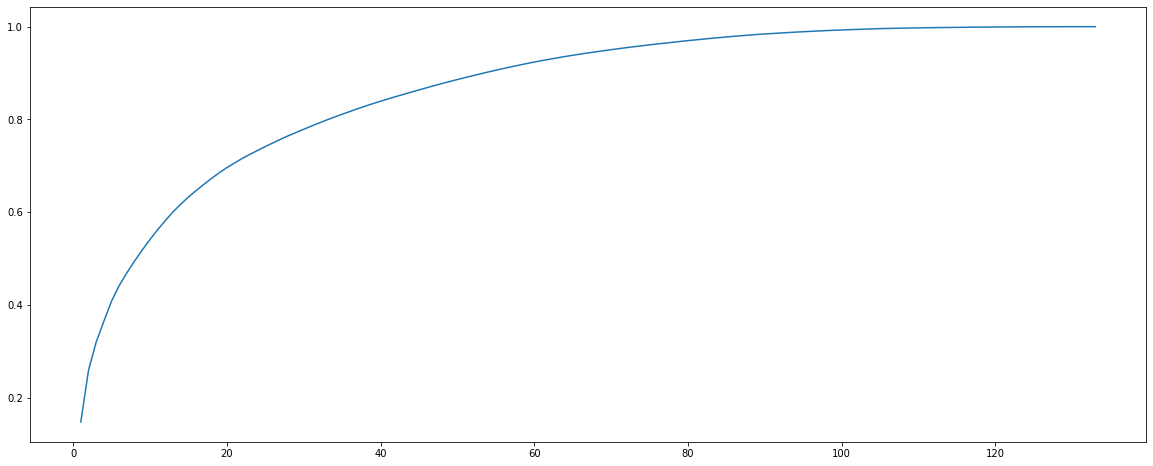

In [57]:
plt.figure(figsize=(20,8))
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [58]:
##Finally let's go ahead and do dimenstionality reduction
pc2=IncrementalPCA(n_components=65)


In [59]:
#applying inremental pca on dataset
newdata=pc2.fit_transform(X_train1)

In [60]:
newdata.shape

(18956, 65)

In [61]:
X_train_pca=pd.DataFrame(newdata)
pd.set_option('display.max_columns', None)
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,-3.827115,-1.729536,-5.111607,3.576168,1.917176,-0.387122,1.482823,1.729946,-2.133600,-0.527725,0.496523,-3.744086,0.059901,-0.160806,-1.269219,-0.111381,-1.212026,-2.061871,-0.948999,-0.240807,-0.559065,-0.261438,0.068054,-0.486188,-0.119693,-0.367965,-0.260813,0.187036,-0.011090,-0.583058,-0.035261,-0.397064,-0.306397,-0.447000,0.163897,-0.614413,0.169458,-0.854957,-0.512380,0.390155,0.315242,-0.182758,-0.284752,-0.196843,-0.391507,0.625777,-0.571766,0.057322,0.071889,0.091202,-0.235260,0.634454,-0.134904,0.078917,-0.180963,-0.204653,-0.374837,0.422569,-0.186757,-0.155695,-0.504934,0.013588,0.225534,-0.377979,-0.804495
1,-0.709628,0.220591,-1.555638,-3.289875,-1.827246,-2.229962,-0.003404,-0.112760,0.899583,-0.176918,-0.810724,-0.566502,0.658995,-2.439144,0.028686,-0.296005,0.324196,0.482778,1.242890,-0.683538,0.415259,-0.690180,0.234333,-0.007541,0.243763,-0.059975,0.205623,-0.703755,0.308712,0.371269,-0.086567,0.036533,0.043230,-0.625606,0.170976,-0.123628,-0.472309,-0.317515,-0.311590,-0.255935,-0.000686,-0.193334,0.443590,0.315229,0.818356,-0.781766,0.523302,1.085631,0.542006,-0.437139,0.249839,-0.020829,-0.182281,1.195198,0.674347,-0.111418,0.036478,-0.275865,-0.471379,0.068532,-0.105158,-0.074665,0.144103,0.143632,0.145423
2,6.134768,-3.282526,-2.816275,2.515540,-1.388382,-1.116613,0.289674,-0.818863,-0.712702,-0.143508,-1.177171,-1.877621,-0.546982,-0.700502,-2.467752,1.908491,1.477586,-0.125516,0.909716,-2.145722,-0.915838,0.803615,0.613865,-0.686822,-0.704635,-1.172432,-0.976146,-0.554646,-0.455359,0.758324,0.650314,0.619120,0.155081,0.742583,0.142683,-0.264470,-0.497146,1.602563,0.946819,-1.245408,0.810460,-1.568732,-0.998222,-1.779346,-0.049812,0.253491,0.365553,0.718501,-0.662991,-0.092975,0.589249,-0.621765,-0.573341,0.790416,-0.433264,-0.486765,-0.618779,-0.232633,0.426873,0.676810,0.121135,-0.403591,-0.113190,-0.152764,0.641852
3,0.650996,6.225020,0.707947,-1.193735,-0.701414,2.869030,-1.840924,-1.170644,-0.408903,-1.354166,-0.435559,-2.514348,-2.442416,1.049318,0.543464,0.469809,-0.577787,0.295834,-0.499919,-0.532026,-0.992894,-0.667779,1.624437,-0.133483,-0.655981,-0.056291,-0.204383,-0.010476,0.459707,-0.390626,-0.296515,-0.607389,-0.367659,-0.903418,-1.333616,0.140229,0.188204,-0.350309,-1.428803,-1.055225,0.709228,-0.896349,0.940768,0.721087,0.032255,0.523051,0.521817,0.498310,-0.774710,-0.767303,1.479096,-0.308063,-0.655997,0.656373,0.319547,-0.343777,-0.321250,0.060689,0.163075,1.032883,0.183784,0.319355,-0.386606,-0.854330,0.730348
4,6.950618,0.249558,-4.251190,-1.819002,2.713771,-3.479836,0.311995,1.805645,-0.799569,-2.007716,-1.060090,1.633983,-0.309445,-3.867262,1.505929,-0.417648,0.524332,-0.159974,-0.131180,1.027956,-0.088686,-0.560521,-0.378251,0.512545,-0.378046,-0.650441,-0.949861,1.545590,1.688767,-0.102217,-0.979468,0.843433,0.170791,0.271392,0.082097,-0.454591,-0.681289,-0.338147,0.369829,-0.446330,0.693045,-0.029148,-0.529347,-0.490221,-0.521170,0.265559,0.605302,0.335088,0.226513,0.121407,-0.157346,0.576479,0.062059,0.072001,-0.107878,-0.428266,-0.117589,0.118340,0.703009,2.043300,-0.433946,0.304212,-0.782285,0.093954,0.789967


In [62]:
#appling PCA transform on test data 
newdata2=pc2.transform(X_test1)

In [63]:
X_test_pca=pd.DataFrame(newdata2)
pd.set_option('display.max_columns', None)
X_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,1.221736,-4.274759,0.337775,-1.982632,-1.098533,0.159924,-1.136959,-0.165211,-3.138506,-2.358608,2.866892,2.132595,-1.256793,0.331856,-0.529457,-0.961960,0.531992,0.868689,0.378650,-0.313677,0.230067,0.822089,-0.217042,-0.699343,0.199263,-1.007420,0.507949,2.021651,-0.052199,-0.278194,-0.517463,0.721988,0.457042,0.601221,-1.651137,0.843000,-0.113803,0.307194,0.081776,-0.377292,-0.377006,1.686845,-0.931348,0.518254,0.207346,0.013217,0.004018,0.123254,0.530160,0.169992,-1.267565,-0.333287,-2.639240,-1.025135,0.697281,1.081811,0.938255,-0.010740,0.172945,-0.481078,-0.360548,-0.801785,0.232206,0.084714,0.987915
1,-5.738588,-1.551825,1.576008,-1.805514,-1.317845,0.475480,0.212073,-0.985303,2.101331,-0.000271,-1.192043,-0.216677,0.525529,-0.318935,-1.146905,0.361268,-0.033832,1.253787,-1.193557,0.581962,1.332314,-1.113923,-0.322048,1.065347,0.444773,-0.923510,0.574427,0.356519,1.068091,1.042076,1.758210,-0.303044,0.032279,2.631212,-0.294874,0.038267,-0.464924,-1.443104,-3.385002,-0.836842,-0.129564,0.792394,-0.617083,-0.520496,-0.086960,0.013312,0.326560,-0.196106,0.203750,0.479523,0.437521,-0.042601,0.111267,1.453959,-0.502046,0.523148,0.398253,-1.728044,0.129907,0.288603,0.105290,0.643133,-0.215819,-0.192797,-0.114242
2,-6.475794,-2.618194,1.689139,0.066460,0.633095,-0.064728,-0.044598,-0.134499,-2.488172,-0.081667,1.783824,-0.849384,1.038224,-0.250716,-0.153363,0.256250,-1.530951,-1.701935,2.837172,0.361888,-1.031067,-1.647947,0.085197,-1.648062,0.873909,0.961849,-0.941622,-0.996147,0.822958,0.933122,-0.866403,0.476480,0.990640,0.853453,0.640897,-0.107089,-0.921831,1.053282,-0.001252,0.117831,1.939904,-0.159842,-0.261863,0.869009,-0.247258,-0.902739,-0.189824,-0.466141,-0.135207,-0.653278,0.443074,0.407666,0.403241,-2.437890,1.821613,0.386506,0.752500,0.074777,-0.111107,0.587278,-0.044705,0.140532,0.164511,-0.061849,-0.196466
3,3.102856,2.014695,5.668683,0.315622,6.389893,4.880872,-1.373385,0.523688,-0.054427,-1.842443,-0.365672,-2.947311,-1.977227,-1.111532,-1.890923,0.234356,1.639506,-1.134646,-1.373345,-1.160500,1.136419,-0.050274,0.270109,0.925996,1.332399,-1.248650,1.497685,0.118029,1.270475,2.050282,0.849366,0.299586,0.231717,0.391735,2.256958,-0.259872,-0.540301,-0.302770,-0.137155,-0.916767,1.070546,-1.351239,0.271855,0.475809,-1.142570,0.026741,0.291595,0.075757,0.541420,-0.499330,0.896592,0.796485,-1.020769,-0.229806,0.575281,-0.339968,1.508637,-0.277913,-0.457383,0.220699,0.890107,1.113636,0.071168,0.695899,-0.118960
4,1.399708,3.165294,5.663654,4.126441,-1.453029,-2.527219,-0.865384,-4.748403,-0.569126,2.651942,-1.577713,-0.382027,1.781406,0.113547,-1.150221,-1.027387,0.714726,-0.877161,-1.769481,0.454105,-0.950282,-0.582907,0.294216,1.188465,-1.850753,-0.042139,0.340445,0.151570,0.010751,0.053662,1.025118,-0.082516,-0.120581,0.322118,-1.161559,-0.376061,-0.850548,0.479658,0.164867,-0.424991,-1.157796,0.344184,0.689178,-0.250977,1.077391,0.161978,-0.068623,0.473353,0.075881,0.013483,0.579543,-0.446388,-0.267766,1.892364,-0.994183,1.080459,-0.982841,-1.646281,0.788084,0.353614,-0.348590,-0.005234,-0.641898,0.099286,0.196346


In [64]:
X_test_pca.shape


(8124, 65)

In [65]:
# Running the random forest with default parameters.
rfc=RandomForestClassifier()

In [66]:
#fit
rfc.fit(X_train_pca,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
#making prediction 
prediction=rfc.predict(X_test_pca)

In [68]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [69]:
# Let's check the report of our default model
print(classification_report(y_test1,prediction))       

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7925
           1       0.50      0.02      0.03       199

    accuracy                           0.98      8124
   macro avg       0.74      0.51      0.51      8124
weighted avg       0.96      0.98      0.96      8124



In [70]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 3)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [71]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.189671,0.012341,0.052294,0.001589,2,{'max_depth': 2},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,5,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
1,9.329667,0.135679,0.065825,0.002493,5,{'max_depth': 5},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,5,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
2,14.062070,0.091562,0.075838,0.002437,8,{'max_depth': 8},0.972574,0.972567,0.972567,0.972830,0.972567,0.972621,0.000105,4,0.975666,0.976129,0.975140,0.976591,0.975668,0.975839,4.893245e-04
3,16.519127,0.366664,0.075985,0.017447,11,{'max_depth': 11},0.973365,0.972567,0.972567,0.972830,0.972567,0.972779,0.000310,1,0.986085,0.986812,0.987273,0.987273,0.986284,0.986746,4.919403e-04
4,19.275468,0.421027,0.099873,0.005038,14,{'max_depth': 14},0.973365,0.972567,0.972303,0.972830,0.972303,0.972674,0.000397,3,0.993933,0.994197,0.995054,0.994593,0.993076,0.994171,6.654806e-04


In [72]:
scores

{'mean_fit_time': array([ 4.18967123,  9.32966747, 14.06206961, 16.51912689, 19.27546754,
        20.36986198]),
 'std_fit_time': array([0.01234096, 0.13567918, 0.09156164, 0.36666408, 0.42102685,
        0.28201534]),
 'mean_score_time': array([0.0522943 , 0.06582513, 0.07583761, 0.07598472, 0.09987283,
        0.09929452]),
 'std_score_time': array([0.00158932, 0.00249349, 0.00243731, 0.01744721, 0.00503788,
        0.00281325]),
 'param_max_depth': masked_array(data=[2, 5, 8, 11, 14, 17],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 5},
  {'max_depth': 8},
  {'max_depth': 11},
  {'max_depth': 14},
  {'max_depth': 17}],
 'split0_test_score': array([0.97257384, 0.97257384, 0.97257384, 0.97336498, 0.97336498,
        0.97283755]),
 'split1_test_score': array([0.97256661, 0.97256661, 0.97256661, 0.97256661, 0.97256661,
        0.97283039]),
 'split2_test_score': array([0.9

In [73]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, return_train_score=True,
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_pca, y_train1)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [74]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.730006,0.122517,0.060512,0.003493,100,{'n_estimators': 100},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,1,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
1,38.687199,0.208103,0.269513,0.012564,500,{'n_estimators': 500},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,1,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
2,68.305431,0.937453,0.492465,0.013251,900,{'n_estimators': 900},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,1,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
3,98.534285,1.864238,0.687789,0.040213,1300,{'n_estimators': 1300},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,1,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07


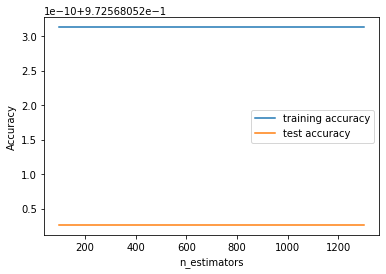

In [75]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [76]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',rf.best_score_,'using',rf.best_params_)

We can get accuracy of 0.9725680520263961 using {'n_estimators': 100}


In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [78]:
# specify number of folds for k-fold CV
n_folds = 3
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1)

In [79]:
# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train1)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed: 24.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [80]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9725680549621281 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


In [81]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [82]:
rfc.fit

<bound method BaseForest.fit of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [83]:
#fit
rfc.fit(X_train_pca,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
#making prediction 
prediction=rfc.predict(X_test_pca)

In [85]:
# Let's check the report of our default model
print(classification_report(y_test1,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7925
           1       0.00      0.00      0.00       199

    accuracy                           0.98      8124
   macro avg       0.49      0.50      0.49      8124
weighted avg       0.95      0.98      0.96      8124



# logistic regression +pca+smote

In [86]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\siddharth2\appdata\local\continuum\anaconda3\lib\site-packages (0.6.1)
Note: you may need to restart the kernel to use updated packages.


In [87]:
sm = SMOTE(random_state=27)
X_train_sm, y_train_sm = sm.fit_sample(X_train_pca, y_train)

In [88]:
smote = LogisticRegression(solver='liblinear').fit(X_train_sm, y_train_sm)

smote_pred = smote.predict(X_test_pca)

# Checking accuracy
accuracy_score(y_test1, smote_pred)

0.8867552929591335

In [89]:
from sklearn.metrics import recall_score
recall_score(y_test, smote_pred)

0.8140703517587939

In [90]:
params = {'C':[0.0001,0.001,0.005,0.1, 0.2,0.3, 0.4, 0.5,0.6, 1, 2], 'penalty':['l1', 'l2']}
logmodel = LogisticRegression()
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(estimator = logmodel, cv = 5, param_grid = params, scoring  = 'recall')
model.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 1, 2],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [91]:
model.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [92]:
from sklearn import metrics
logreg = LogisticRegression(penalty = 'l2', C= 0.5)
logreg.fit(X_train_sm, y_train_sm)

y_pred = logreg.predict(X_test_pca)
print("Accuracy: {0}".format(metrics.accuracy_score(y_test1, y_pred)))
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test1, y_pred)))

Accuracy: 0.8866322008862629
Recall/Sensitivity: 0.8140703517587939


# Decesion tree to get important variable

In [93]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7925
           1       0.47      0.20      0.28       199

    accuracy                           0.97      8124
   macro avg       0.72      0.60      0.63      8124
weighted avg       0.97      0.97      0.97      8124



## Tuning maximum depth

In [95]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 30,3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, return_train_score=True,
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 30, 3)}, pre_dispatch='2*n_jobs'

In [96]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.265288,0.022277,0.005789,0.003211,1,{'max_depth': 1},0.972574,0.972567,0.972567,0.972567,0.972567,0.972568,0.000003,2,0.972567,0.972568,0.972568,0.972568,0.972568,0.972568,7.235976e-07
1,0.873264,0.019849,0.006749,0.002206,4,{'max_depth': 4},0.973892,0.970984,0.971775,0.970984,0.977051,0.972937,0.002316,1,0.975073,0.975800,0.975140,0.975602,0.974349,0.975193,5.029643e-04
2,1.359059,0.018106,0.005449,0.001747,7,{'max_depth': 7},0.972574,0.967819,0.969929,0.967291,0.969665,0.969455,0.001863,3,0.984635,0.984240,0.982657,0.983581,0.982130,0.983449,9.397260e-04
3,1.454676,0.038946,0.005367,0.000914,10,{'max_depth': 10},0.970992,0.961224,0.970456,0.961488,0.963334,0.965499,0.004331,4,0.994461,0.994395,0.991362,0.994263,0.993340,0.993564,1.173329e-03
4,1.486483,0.040883,0.004794,0.002815,13,{'max_depth': 13},0.971783,0.961224,0.966500,0.961752,0.964126,0.965077,0.003842,6,0.999011,0.999604,0.998483,0.999341,0.998945,0.999077,3.799524e-04


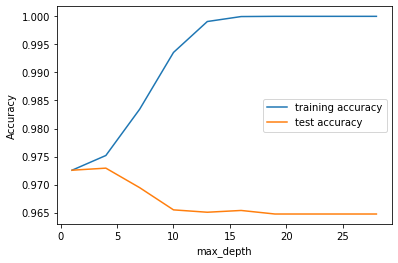

In [97]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [98]:
#checking for min sample leaf
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             p

In [99]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.436227,0.064912,0.005845,0.001990,5,{'min_samples_leaf': 5},0.970728,0.966763,0.971511,0.962807,0.968346,0.968031,0.003111,10,0.990504,0.990109,0.990768,0.990636,0.990768,0.990557,0.000245
1,1.315040,0.054430,0.007094,0.003065,25,{'min_samples_leaf': 25},0.972574,0.971511,0.972039,0.971248,0.973622,0.972199,0.000845,6,0.979359,0.981405,0.979954,0.980086,0.981141,0.980389,0.000767
2,1.295563,0.053826,0.005282,0.003158,45,{'min_samples_leaf': 45},0.974420,0.971775,0.974149,0.969665,0.974941,0.972990,0.001986,3,0.977644,0.978899,0.977382,0.977316,0.978107,0.977870,0.000585
3,1.280410,0.045823,0.005927,0.002440,65,{'min_samples_leaf': 65},0.974420,0.970193,0.971511,0.970193,0.973886,0.972040,0.001799,7,0.977183,0.977316,0.976327,0.977448,0.976525,0.976960,0.000448
4,1.196237,0.073421,0.005639,0.001547,85,{'min_samples_leaf': 85},0.972046,0.971511,0.972303,0.970984,0.975996,0.972568,0.001773,5,0.975534,0.976327,0.975536,0.975470,0.974744,0.975522,0.000501


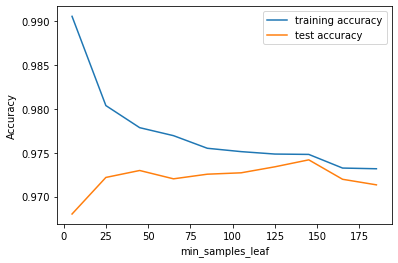

In [100]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [101]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall",return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [102]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.377806,0.026652,0.008412,0.001828,5,{'min_samples_split': 5},0.500000,0.355769,0.375000,0.384615,0.394231,0.401923,0.050661,1,0.963942,0.956731,0.966346,0.973558,0.961538,0.964423,0.005565
1,1.325496,0.050398,0.008676,0.001824,25,{'min_samples_split': 25},0.442308,0.288462,0.365385,0.336538,0.307692,0.348077,0.053846,5,0.677885,0.723558,0.677885,0.774038,0.728365,0.716346,0.036010
2,1.454595,0.061919,0.009308,0.002478,45,{'min_samples_split': 45},0.355769,0.278846,0.307692,0.355769,0.269231,0.313462,0.036791,10,0.569712,0.612981,0.564904,0.649038,0.564904,0.592308,0.033640
3,1.449889,0.040092,0.009353,0.001529,65,{'min_samples_split': 65},0.375000,0.326923,0.307692,0.307692,0.384615,0.340385,0.033086,6,0.461538,0.560096,0.519231,0.516827,0.536058,0.518750,0.032515
4,1.430645,0.040056,0.007084,0.002874,85,{'min_samples_split': 85},0.375000,0.211538,0.298077,0.365385,0.365385,0.323077,0.062196,8,0.413462,0.439904,0.483173,0.524038,0.447115,0.461538,0.038371


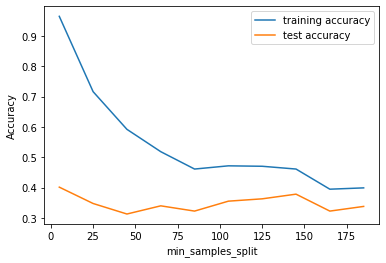

In [103]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [104]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [105]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.066976,0.064189,0.007582,0.001742,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974947,0.973358,0.974149,0.972830,0.974149,0.973887,0.000729,5
1,1.109563,0.026701,0.005476,0.002956,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974947,0.973358,0.974149,0.972830,0.974149,0.973887,0.000729,5
2,1.090964,0.044776,0.005606,0.001962,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974684,0.973358,0.974413,0.972830,0.974149,0.973887,0.000689,3
3,1.093420,0.051565,0.005796,0.002263,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.974684,0.973358,0.974413,0.972830,0.974149,0.973887,0.000689,3
4,1.174993,0.042775,0.006601,0.003236,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974156,0.973886,0.974941,0.973094,0.974149,0.974045,0.000592,1
5,1.099639,0.062516,0.006687,0.001840,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974156,0.973622,0.974941,0.973094,0.974149,0.973992,0.000616,2
6,1.114920,0.053984,0.004780,0.003725,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974156,0.973094,0.973094,0.972830,0.972039,0.973043,0.000678,11
7,1.133969,0.019808,0.005122,0.002116,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.974156,0.973094,0.973094,0.972830,0.972039,0.973043,0.000678,11
8,1.055039,0.025097,0.005552,0.001093,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.974156,0.970456,0.973886,0.969665,0.974677,0.972568,0.002078,15
9,1.076777,0.024673,0.003173,0.003184,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.974156,0.970456,0.973886,0.969665,0.974677,0.972568,0.002078,15


In [106]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9740451513522478
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [107]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [108]:
# accuracy score
clf_gini.score(X_test,y_test)

0.975258493353028

In [109]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz



In [110]:
# Putting features
features = X.columns.tolist()
features

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'tota

In [111]:
# If you're on windows:
# Specifing path for dot file.
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

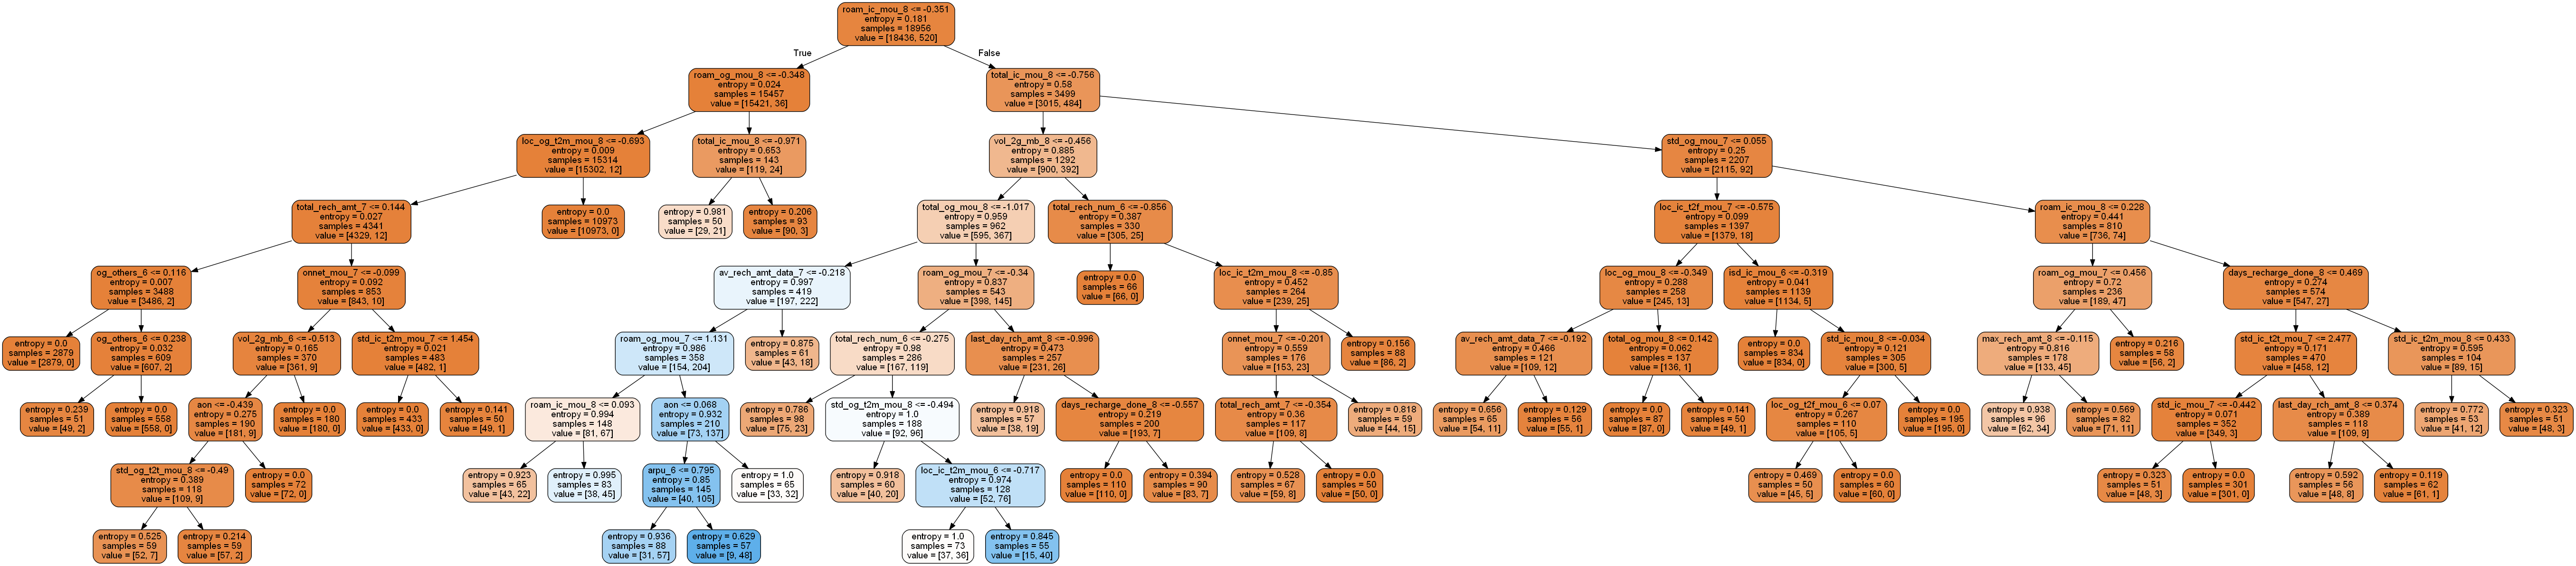

In [112]:
# plotting the tree`
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [113]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7925
           1       0.49      0.29      0.37       199

    accuracy                           0.98      8124
   macro avg       0.74      0.64      0.68      8124
weighted avg       0.97      0.98      0.97      8124



In [114]:
print("Recall/Sensitivity: {0}".format(metrics.recall_score(y_test, y_pred)))

Recall/Sensitivity: 0.2914572864321608


In [115]:
#Importances on the basis of gini
importances = clf_gini.feature_importances_
importances



array([0.00231606, 0.        , 0.        , 0.        , 0.00704902,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.50153949, 0.        , 0.03511387, 0.06162358,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01017547, 0.00274597, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00435506,
       0.        , 0.        , 0.00106574, 0.        , 0.        ,
       0.00377639, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02593538, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0057059 , 0.        , 0.        , 0.        , 0.        ,
       0.02403825, 0.        , 0.        , 0.        , 0.00244589,
       0.        , 0.00331115, 0.        , 0.00844963, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00454898,
       0.        , 0.        , 0.00153039, 0.00211543, 0.     

In [116]:
sorted(set(zip(features, clf_gini.feature_importances_)), reverse=True, key= lambda x: x[1])

[('roam_ic_mou_8', 0.5015394879379905),
 ('total_ic_mou_8', 0.16694606429240771),
 ('roam_og_mou_8', 0.061623583050440765),
 ('vol_2g_mb_8', 0.043596037360820544),
 ('roam_og_mou_7', 0.03511387363229418),
 ('std_og_mou_7', 0.0259353758251902),
 ('total_og_mou_8', 0.02403825483226483),
 ('last_day_rch_amt_8', 0.014317485605770647),
 ('total_rech_num_6', 0.010992008461484931),
 ('total_rech_amt_7', 0.010768617918450943),
 ('days_recharge_done_8', 0.010663978488533475),
 ('loc_og_t2m_mou_8', 0.010175473552939967),
 ('av_rech_amt_data_7', 0.008454372664591538),
 ('loc_ic_t2f_mou_7', 0.00844962934781295),
 ('onnet_mou_7', 0.007049019013757656),
 ('aon', 0.00646703282224496),
 ('og_others_6', 0.005705903481780234),
 ('std_ic_t2t_mou_7', 0.004548978095939623),
 ('isd_ic_mou_6', 0.004448076428662897),
 ('loc_og_mou_8', 0.00435505832955374),
 ('vol_2g_mb_6', 0.004102865293148344),
 ('max_rech_amt_8', 0.003977836195242064),
 ('std_ic_mou_7', 0.003946976135967386),
 ('std_og_t2m_mou_8', 0.0037763

#top variable which will predict churn
1. roam_ic_mou_8
2. total_ic_mou_8
3. roam_og_mou_8
4. vol_2g_mb_8
5. roam_og_mou_7
6. std_og_mou_7
7. total_og_mou_8
8. last_day_rch_amt_8
9. total_rech_num_6
10. days_recharge_done_8
11. loc_og_t2m_mou_8
12. av_rech_amt_data_7
13. loc_ic_t2f_mou_7
14. onnet_mou_7

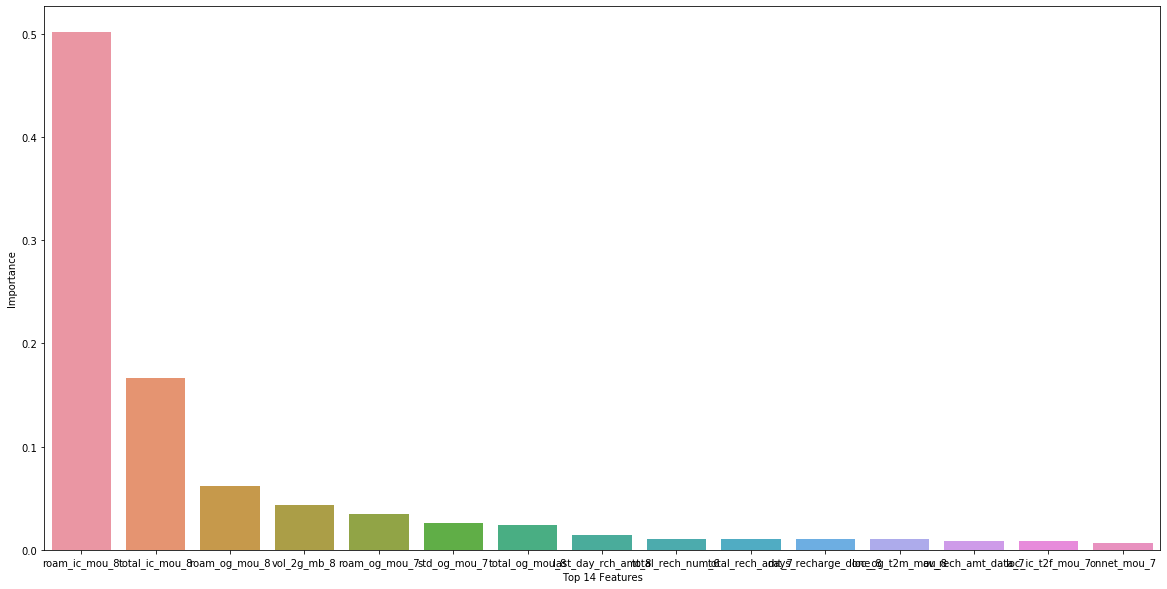

In [117]:
#Showing importance of top 14 selected features
imp=clf_gini.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))

df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)


plt.figure(figsize=(20, 10))

ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:15])
ax.set(xlabel = 'Top 14 Features', ylabel = 'Importance')
plt.show()

### Driver Variables of Churn and Churn Analysis & Recommendation

- ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

- days_recharge_done_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

- last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

- roam_oc_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

- std_og_mou_7 - Lower the STD outgoing call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

## Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* Provide promotional offers to customers on the verge of exit.